<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png" align=left alt="CC BY license logo" /><br /><br />
Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments/improvements, email nathan.kelber@ithaka.org.**<br />
____

# Exploring Metadata and Pre-Processing

**Description of methods in this notebook:**
This [notebook](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook) shows how to explore and pre-process the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) of a [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) using [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas). 

The following processes are described:

* Importing a [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file) containing the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) for a given dataset ID
* Creating a [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) dataframe to view the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata)
* Pre-processing your [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) by filtering out unwanted texts
* Exporting a list of relevant IDs to a [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file)
* Visualizing the metadata of your pre-processed [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) by the number of documents/year and pages/year

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

[Take me to the **Research Version** of this notebook ->](./exploring-metatadata-for-research)

**Difficulty:** Intermediate

**Completion time:** 45 minutes

**Knowledge Required:** 
* Python Basics Series ([Start Python Basics I](./python-basics-1.ipynb))

**Knowledge Recommended:**

* [Pandas I](./pandas-1.ipynb)

**Data Format:** [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file)

**Libraries Used:**
* [tdm_client](https://docs.tdm-pilot.org/key-terms/#tdm-client) to retrieve the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) in a [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file)
* [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) to manipulate and visualize the metadata

**Research Pipeline:** None
____

## Import your dataset

We'll use the `tdm_client` library to automatically retrieve the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) for a [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). We can retrieve [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) in a [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file) using the `get_metadata` method.

Enter a [dataset ID](https://docs.tdm-pilot.org/key-terms/#dataset-ID) in the next code cell. 

If you don't have a dataset ID, you can:
* Use the sample dataset ID already in the code cell
* [Create a new dataset](https://tdm-pilot.org/builder)
* [Use a dataset ID from other pre-built sample datasets](https://tdm-pilot.org/dataset/dashboard)

In [1]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
dataset_id = "7e41317e-740f-e86a-4729-20dab492e925"

Next, import the `tdm_client`, passing the `dataset_id` as an argument using the `get_metadata` method.

In [2]:
# Import the `tdm_client`
import tdm_client

# Pull in our dataset CSV using 
dataset_metadata = tdm_client.get_metadata(dataset_id)

INFO:root:Metdata file C:\Users\tyt3\data\7e41317e-740f-e86a-4729-20dab492e925.csv exists. Not re-downloading.


We are ready to import pandas for our analysis and create a dataframe. We will use the `read_csv()` method to create our dataframe from the CSV file.

In [3]:
# Import pandas 
import pandas as pd

# Create our dataframe
df = pd.read_csv(dataset_metadata)

We can confirm the size of our dataset using the `len()` function on our dataframe.

In [4]:
original_document_count = len(df)
print('Total original documents:', original_document_count)

Total original documents: 6745


Now let's take a look at the data in our dataframe `df`. We will set pandas to show all columns using `set_option()` then get a preview using `head()`.

In [5]:
# Set the pandas option to show all columns
pd.set_option("max_columns", None) 

# Show the first five rows of our dataframe
df.head() 

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/2869669,In Praise of Two Eminent Shakespeareans,Shakespeare Quarterly,1979,NaN,article,jstor,1979-01-01,1.0,30,http://www.jstor.org/stable/2869669,A. B. Kernan,Folger Shakespeare Library,eng,100,103,NaN,1959,4,unigram; bigram; trigram
1,http://www.jstor.org/stable/2871200,Shakespeare In Edinburgh,Shakespeare Quarterly,1985,NaN,article,jstor,1985-07-01,2.0,36,http://www.jstor.org/stable/2871200,Gerald M. Berkowitz,Folger Shakespeare Library,eng,222,226,NaN,2961,5,unigram; bigram; trigram
2,http://www.jstor.org/stable/2871374,Subject Index,Shakespeare Quarterly,1997,NaN,article,jstor,1997-01-01,5.0,48,http://www.jstor.org/stable/2871374,NaN,Folger Shakespeare Library,eng,840,848,NaN,6128,9,unigram; bigram; trigram
3,http://www.jstor.org/stable/2868126,Shakespeare and Francis Sabie,Shakespeare Quarterly,1964,NaN,article,jstor,1964-10-01,4.0,15,http://www.jstor.org/stable/2868126,Ann Stanford,Folger Shakespeare Library,eng,454,455,NaN,636,2,unigram; bigram; trigram
4,http://www.jstor.org/stable/2871404,Review Article,Shakespeare Quarterly,1997,NaN,article,jstor,1997-04-01,1.0,48,http://www.jstor.org/stable/2871404,M. Lindsay Kaplan,Folger Shakespeare Library,eng,91,92,NaN,1011,2,unigram; bigram; trigram


---
## Metadata Type by Column Name

Here are descriptions for the metadata types found in each column:

|Column Name|Description|
|---|---|
|id|a unique item ID (In JSTOR, this is a stable URL)|
|title|the title for the item|
|isPartOf|the larger work that holds this title (for example, a journal title)|
|publicationYear|the year of publication|
|doi|the digital object identifier for an item|
|docType|the type of document (for example, article or book)|
|provider|the source or provider of the dataset|
|datePublished|the publication date in yyyy-mm-dd format|
|issueNumber|the issue number for a journal publication|
|volumeNumber|the volume number for a journal publication|
|url|a URL for the item and/or the item's metadata|
|creator|the author or authors of the item|
|publisher|the publisher for the item|
|language|the language or languages of the item (eng is the ISO 639 code for English)|
|pageStart|the first page number of the print version|
|pageEnd|the last page number of the print version|
|placeOfPublication|the city of the publisher|
|wordCount|the number of words in the item|
|pageCount|the number of print pages in the item|
|outputFormat|what data is available ([unigrams](https://docs.tdm-pilot.org/key-terms/#unigram), [bigrams](https://docs.tdm-pilot.org/key-terms/#bigram), [trigrams](https://docs.tdm-pilot.org/key-terms/#trigram), and/or full-text)|

If there are any columns you would like to drop from your analysis, you can drop them with:

`df df.drop(['column_name1', 'column_name2', ...], axis=1)`

In [6]:
# Drop each of these named columns
df = df.drop(['outputFormat', 'pageEnd', 'pageStart', 'datePublished', 'language'], axis=1)

# Show the first five rows of our updated dataframe
df.head()

,id,title,isPartOf,publicationYear,doi,docType,provider,issueNumber,volumeNumber,url,creator,publisher,placeOfPublication,wordCount,pageCount
0,http://www.jstor.org/stable/2869669,In Praise of Two Eminent Shakespeareans,Shakespeare Quarterly,1979,NaN,article,jstor,1.0,30,http://www.jstor.org/stable/2869669,A. B. Kernan,Folger Shakespeare Library,NaN,1959,4
1,http://www.jstor.org/stable/2871200,Shakespeare In Edinburgh,Shakespeare Quarterly,1985,NaN,article,jstor,2.0,36,http://www.jstor.org/stable/2871200,Gerald M. Berkowitz,Folger Shakespeare Library,NaN,2961,5
2,http://www.jstor.org/stable/2871374,Subject Index,Shakespeare Quarterly,1997,NaN,article,jstor,5.0,48,http://www.jstor.org/stable/2871374,NaN,Folger Shakespeare Library,NaN,6128,9
3,http://www.jstor.org/stable/2868126,Shakespeare and Francis Sabie,Shakespeare Quarterly,1964,NaN,article,jstor,4.0,15,http://www.jstor.org/stable/2868126,Ann Stanford,Folger Shakespeare Library,NaN,636,2
4,http://www.jstor.org/stable/2871404,Review Article,Shakespeare Quarterly,1997,NaN,article,jstor,1.0,48,http://www.jstor.org/stable/2871404,M. Lindsay Kaplan,Folger Shakespeare Library,NaN,1011,2


If you would like to know if a particular id is in the dataframe, you can use the `in` operator to return a boolean value (True or False). 

In [7]:
# Check if a particular item id is in the `id` column
'http://www.jstor.org/stable/2868641' in df.id.values

True

## Filtering Out Unwanted Texts

Now that we have filtered out unwanted metadata columns, we can begin filtering out any texts that may not match our research interests. Let's examine the first and last twenty rows of the dataframe to see if we can identify texts that we would like to remove. We are looking for patterns in the metadata that could help us remove many texts at once.

In [8]:
# Preview the first twenty items in the dataframe
# df.head(20) # Change 20 to view a greater or lesser number of rows

In [9]:
# Preview the last twenty items in the dataframe
# df.tail(20) # Change 20 to view a greater or lesser number of rows

### Remove all rows without data for a particular column

For example, we may wish to remove any texts that do not have authors. (In the case of journals, this may be helpful for removing paratextual sections such as the table of contents, indices, etc.) The column of interest in this case is `creator`. 

In [10]:
# Remove all texts without an author
df = df.dropna(subset=['creator']) #drop each row that has no value under 'creators'

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [11]:
# Print the total original documents followed by the current number
print('Total original documents:', original_document_count)
print('Total current documents: ', len(df))

Total original documents: 6745
Total current documents:  5348


### Remove row based on the content of a particular column

We can also remove texts that have a particular value in a column. Here are a few examples.

In [12]:
# Remove all items with a particular title
df = df[df.title != 'Review Article'] # Change `Review Article` to your desired title

In [13]:
# Remove all items with less than 3000 words
df = df[df.wordCount > 3000] # Change `3000` to your desired number

In [14]:
# Print the total original documents followed by the current number
print('Total original documents:', original_document_count)
print('Total current documents: ', len(df))

Total original documents: 6745
Total current documents:  1647


Take a final look at your dataframe to make sure the current texts fit your research goals. In the next step, we will save the IDs of your pre-processed dataset.

In [15]:
# Preview the first 50 lines of your dataset
df.head(50)

,id,title,isPartOf,publicationYear,doi,docType,provider,issueNumber,volumeNumber,url,creator,publisher,placeOfPublication,wordCount,pageCount
7,http://www.jstor.org/stable/2868641,Reviews of Books Previously Recorded in Shakes...,Shakespeare Quarterly,1973,NaN,article,jstor,4.0,24,http://www.jstor.org/stable/2868641,Bruce Nesbitt,Folger Shakespeare Library,NaN,4875,11
10,http://www.jstor.org/stable/2867059,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,1961,NaN,article,jstor,3.0,12,http://www.jstor.org/stable/2867059,David Kaula,Folger Shakespeare Library,NaN,7137,13
15,http://www.jstor.org/stable/2866396,Pepys' Shakespeare Song,Shakespeare Quarterly,1955,NaN,article,jstor,2.0,6,http://www.jstor.org/stable/2866396,MacDonald Emslie,Folger Shakespeare Library,NaN,4210,12
28,http://www.jstor.org/stable/2870303,"""Something Rich and Strange"": Caliban's Theatr...",Shakespeare Quarterly,1985,NaN,article,jstor,4.0,36,http://www.jstor.org/stable/2870303,Virginia Mason Vaughan,Folger Shakespeare Library,NaN,7515,16
32,http://www.jstor.org/stable/2870754,They Were Not Such Good Years,Shakespeare Quarterly,1989,NaN,article,jstor,1.0,40,http://www.jstor.org/stable/2870754,Frankie Rubinstein,Folger Shakespeare Library,NaN,3686,5
35,http://www.jstor.org/stable/2870928,Grubbing Up the Stock: Dramatizing Queens in H...,Shakespeare Quarterly,1988,NaN,article,jstor,3.0,39,http://www.jstor.org/stable/2870928,Kim H. Noling,Folger Shakespeare Library,NaN,9411,16
43,http://www.jstor.org/stable/24778435,"""Hamlet's"" Alchemy: Transubstantiation, Modern...",Shakespeare Quarterly,2013,NaN,article,jstor,1.0,64,http://www.jstor.org/stable/24778435,Katherine Eggert,Folger Shakespeare Library,NaN,6242,13
46,http://www.jstor.org/stable/2869302,"Shakespeare in Washington, D. C.",Shakespeare Quarterly,1979,NaN,article,jstor,2.0,30,http://www.jstor.org/stable/2869302,Jeanne Addison Roberts,Folger Shakespeare Library,NaN,3227,5
47,http://www.jstor.org/stable/2869196,Logic Versus The Slovenly World in Shakespeare...,Shakespeare Quarterly,1980,NaN,article,jstor,3.0,31,http://www.jstor.org/stable/2869196,"O. B. Hardison, Jr.",Folger Shakespeare Library,NaN,6924,12
49,http://www.jstor.org/stable/2869529,Other Shakespeare in New York City,Shakespeare Quarterly,1980,NaN,article,jstor,2.0,31,http://www.jstor.org/stable/2869529,Carol Rosen,Folger Shakespeare Library,NaN,3267,6


## Saving a list of IDs to a CSV file

In [16]:
# Write the column "id" to a CSV file called `pre-processed_###.csv` where ### is the `dataset_id`
df["id"].to_csv('data/pre-processed_' + dataset_id + '.csv')

Download the "pre-processed_###.csv" file (where ### is the `dataset_id`) for future analysis. You can use this file in combination with the dataset ID to automatically filter your texts and reduce the processing time of your analyses.

---
## Visualizing the Pre-Processed Data

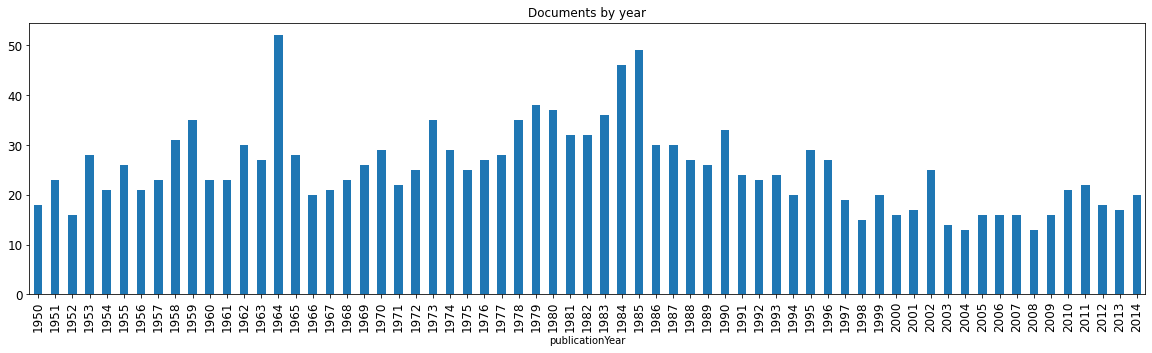

In [17]:
# Group the data by publication year and the aggregated number of ids into a bar chart
df.groupby(['publicationYear'])['id'].agg('count').plot.bar(title='Documents by year', figsize=(20, 5), fontsize=12); 

# Read more about Pandas dataframe plotting here: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

And now let's look at the total page numbers by year.

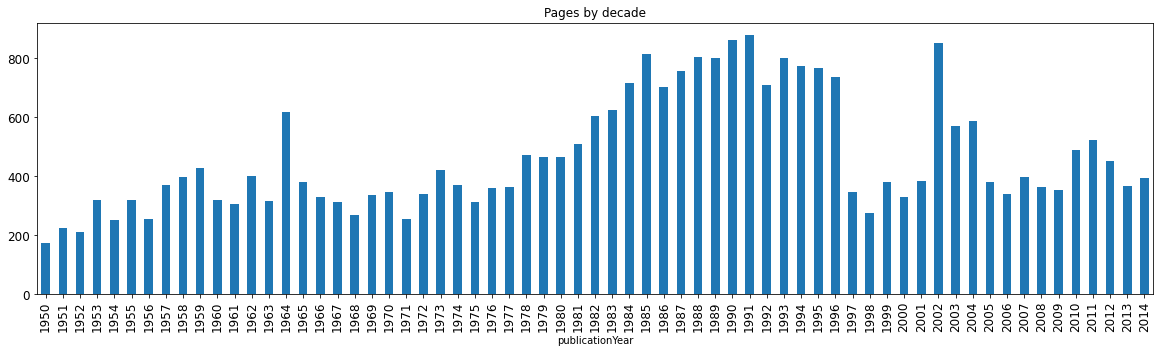

In [18]:
# Group the data by publication year and aggregated sum of the page counts into a bar chart

df.groupby(['publicationYear'])['pageCount'].agg('sum').plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12);